In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import os
cwd = os.getcwd()
base_path = os.path.abspath(os.path.join(cwd, '../../'))

## Fig.2 Overall performance of scTranslator

- Performance of scTranslator on test dataset

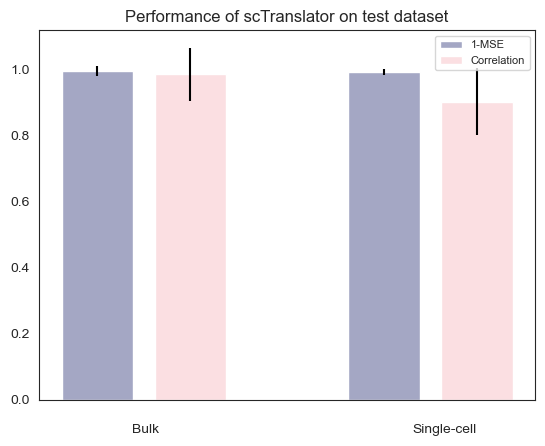

In [2]:
path = base_path + '/result/fig2/a/bulk_test_all.csv'
bulk_performer_all = pd.read_csv(path, sep=',')[['test_loss', 'test_ccc']]
path = base_path + '/result/fig2/a/single-cell_test_all.csv'
sc_performer_all = pd.read_csv(path, sep=',')[['test_loss', 'test_ccc']]

mean_mse = (1-np.mean(bulk_performer_all['test_loss']), 1-np.mean(sc_performer_all['test_loss']))
std_mse = (np.std(bulk_performer_all['test_loss']), np.std(sc_performer_all['test_loss']))
mean_ccc = (np.mean(bulk_performer_all['test_ccc']), np.mean(sc_performer_all['test_ccc']))
std_ccc = (np.std(bulk_performer_all['test_ccc']), np.std(sc_performer_all['test_ccc']))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.25
rects1 = ax.bar(index, mean_mse, bar_width, color='#A4A7C4',
                yerr=std_mse, label='1-MSE')
rects2 = ax.bar(index + 1.3*bar_width, mean_ccc, bar_width, color='#FBDFE2', 
                yerr=std_ccc, label='Correlation')

ax.set_title('Performance of scTranslator on test dataset')
ax.legend(loc='upper right',  fontsize=8)
plt.text(0.12, -0.1, 'Bulk')
plt.text(1.1, -0.1, 'Single-cell')
plt.xticks([])
plt.show()

- Performance of scTranslator on training dataset

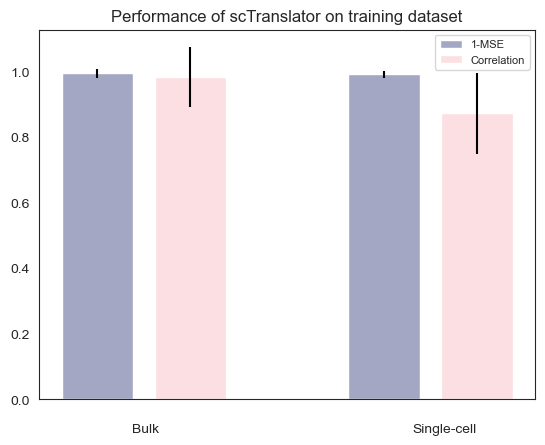

In [3]:
path = base_path + '/result/fig2/a/bulk_train_all.csv'
bulk_performer_all = pd.read_csv(path, sep=',')[['train_loss', 'train_ccc']]
path = base_path + '/result/fig2/a/single-cell_train_all.csv'
sc_performer_all = pd.read_csv(path, sep=',')[['train_loss', 'train_ccc']]

mean_mse = (1-np.mean(bulk_performer_all['train_loss']), 1-np.mean(sc_performer_all['train_loss']))
std_mse = (np.std(bulk_performer_all['train_loss']), np.std(sc_performer_all['train_loss']))
mean_ccc = (np.mean(bulk_performer_all['train_ccc']), np.mean(sc_performer_all['train_ccc']))
std_ccc = (np.std(bulk_performer_all['train_ccc']), np.std(sc_performer_all['train_ccc']))

fig, ax = plt.subplots()
index = np.arange(2)
rects1 = ax.bar(index, mean_mse, bar_width, color='#A4A7C4',
                yerr=std_mse, label='1-MSE')
rects2 = ax.bar(index + 1.3*bar_width, mean_ccc, bar_width, color='#FBDFE2', 
                yerr=std_ccc, label='Correlation')

ax.set_title('Performance of scTranslator on training dataset')
ax.legend(loc='upper right',  fontsize=8)

plt.text(0.12, -0.1, 'Bulk')
plt.text(1.1, -0.1, 'Single-cell')
plt.xticks([])
plt.show()

- Joint plots of ground truth and prediction

<Figure size 600x600 with 0 Axes>

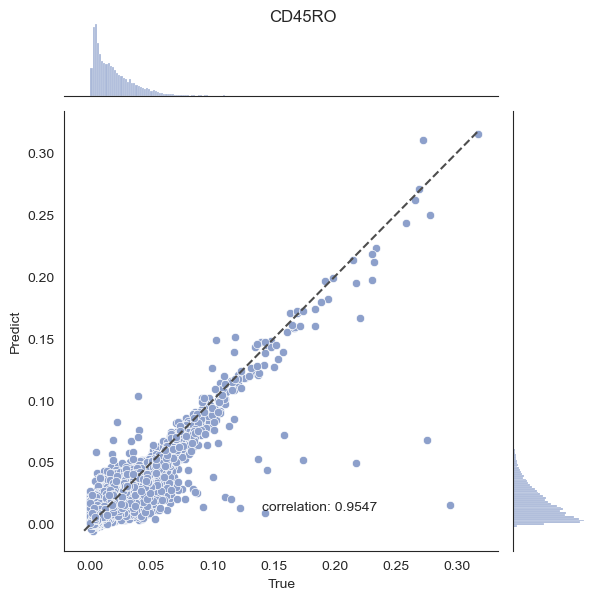

In [4]:
path = base_path + '/result/fig2/b/y_pred.csv'
y_hat = pd.read_csv(path, sep=',').drop(columns='Unnamed: 0')
path = base_path + '/result/fig2/b/y_truth.csv'
y = pd.read_csv(path, sep=',').drop(columns='Unnamed: 0')

pro =  'CD45RO'
true_value = y[pro]
imputed_value = y_hat[pro]
data = pd.DataFrame([true_value, imputed_value], index=['True','Predict']).T
correlation = (np.matmul(true_value,imputed_value))/(np.linalg.norm(true_value)*np.linalg.norm(imputed_value))

fig = plt.figure(figsize=(6, 6))
g = sns.jointplot(data=data, x='True', y='Predict', color=sns.color_palette("Set2")[2])
g.figure.suptitle(pro, verticalalignment='center')
axmin = min(min(imputed_value),min(true_value))
axmax = max(max(imputed_value),max(true_value))
plt.plot([axmin,axmax],[axmin,axmax],ls='--',c='.3')
plt.text(0.45*(axmax-axmin)+axmin,0.05*(axmax-axmin)+axmin,'correlation: '+str(round(correlation,4)))
plt.show()

- Predictability

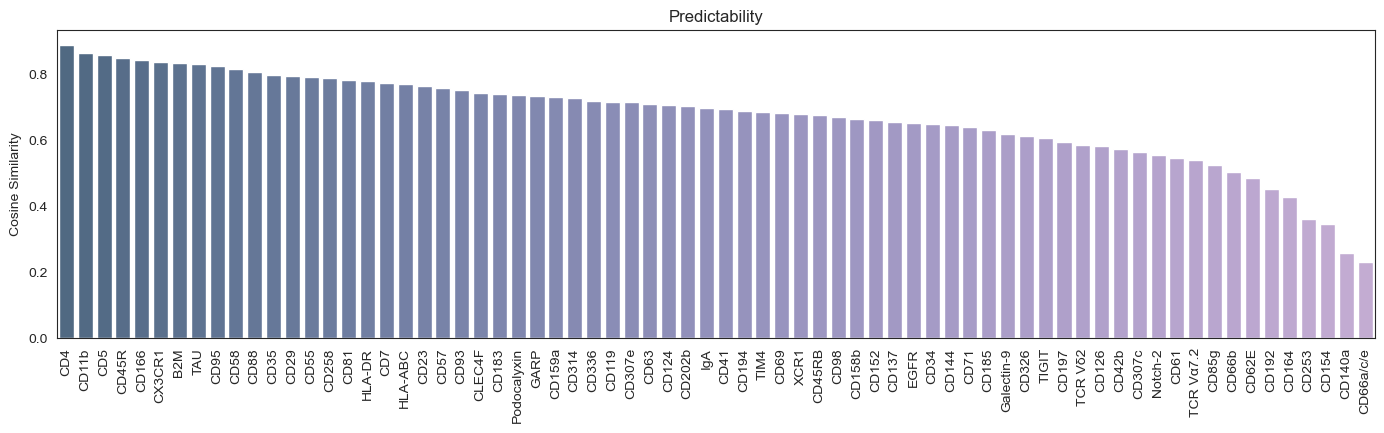

In [5]:
path = base_path+'/result/fig2/c/predictability.csv'
data = pd.read_csv(path,index_col=0)
data.sort_values('Predictability', ascending=False,inplace=True)
data.index = range(data.shape[0])
data.to_csv(path)


interval = 4
num_colors = len(data[data.index % interval == 1])
color = sns.cubehelix_palette(num_colors, start=2.5, rot=0.5, gamma=.5, dark=0.15, light=0.5, reverse=True)
fig = plt.figure(figsize=(17,4))
ax = sns.barplot(data=data[data.index%interval==1], x='Protein', y='Predictability', palette=color)
ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('')
plt.ylabel('Cosine Similarity')
plt.title('Predictability')
plt.show()


Top 20% protein

In [6]:
for i in data.Protein[:int(len(data)*0.2)]:
    print(i)

CLEC2
CD4
CD352
CD8a
CD109
CD11b
CXCR5
CD11a
CD99
CD5
CD82
Ig light chain κ
CD47
CD45R
CD48
CD31
CD45RA
CD166
NLRP2
IgG
CD45
CX3CR1
CD205
CD276
CLEC12A
B2M
TCR Vβ13.1
DR3
CD305
TAU
Galectin-3
CD28
CD18
CD95
CD360
CD371
HLA-E
CD58
CD16
c-Met
CD244
CD88
CD224
CD257
CD122
CD35
CD11c
CD3
CD44
CD29
CD2
CD52
CD49d
CD55
HLA-F
CD45RO


Bottom 20% proteins

In [7]:
for i in data.Protein[-int(len(data)*0.2):]:
    print(i)

CD22
CD42b
CD142
CD309
CD252
CD307c
CD294
CD328
CD94
Notch-2
CD272
ERK1
CD243
CD61
C5L2
CD68
integrin β7
TCR Vα7.2
CD70
CD59
CD186
CD85g
CD49a
CD196
CD105
CD66b
VEGFR-3
S1probe
CD301
CD62E
TCR Vα7
CD158e1
CD1a
CD192
CD103
CD135
CD146
CD164
CD46
CD235ab
TMEM119
CD253
Cadherin 11
CD271
CD277
CD154
CD284
CD140b
CD171
CD140a
MICA-MICB
CD115
CD177
CD66a/c/e
CD11a/CD18
CRACC


Enrichment results

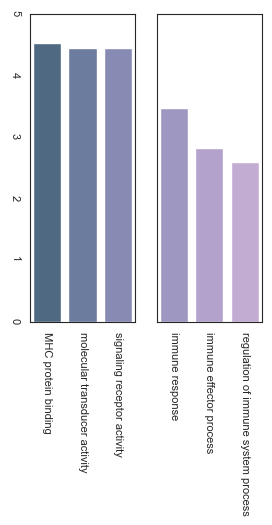

In [8]:
from matplotlib.gridspec import GridSpec
plt.rcParams['font.size'] = 8
factor = 5
fig = plt.figure(figsize=(0.6*factor,4))
gs = GridSpec(1, 2, width_ratios=[0.3*factor, 0.3*factor])

# Plot Top20%
filepath = base_path+'/result/fig2/d/1-Top20% enrichment results.csv'
df = pd.read_csv(filepath)
df['-log_10(P-value)'] = -np.log10(df['adjusted_p_value'])
df = df.iloc[[0,1,2],:]
color = sns.cubehelix_palette(6,start=2.5, rot=0.5, gamma=.5, dark=0.15, light=0.5, reverse=True)
ax1 = fig.add_subplot(gs[0])
sns.barplot(data=df, x="term_name", y='-log_10(P-value)', palette=color[:3], ax=ax1)

# Plot Bottom20%
filepath = base_path+'/result/fig2/d/2-Bottom20% enrichment results.csv'
df = pd.read_csv(filepath)
df['-log_10(P-value)'] = -np.log10(df['adjusted_p_value'])
df = df.iloc[[0,1,2],:]
color = [color[-3],color[-2],color[-1]]
ax2 = fig.add_subplot(gs[1])
sns.barplot(data=df, x="term_name", y='-log_10(P-value)', palette=color, ax=ax2)

ylim = max(ax1.get_ylim(), ax2.get_ylim())
ax1.set_ylim(ylim)
ax2.set_ylim(ylim)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlabel('')

ax1.yaxis.set_major_formatter(plt.ScalarFormatter())
ax1.set_yticks(range(len(ax1.get_yticklabels())))
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=-90)
ax1.set_xticks(range(len(ax1.get_xticklabels())))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-90)
ax2.set_xticks(range(len(ax2.get_xticklabels())))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-90)
ax2.set_yticklabels([])
plt.show()

Ablation study of pre-training stage

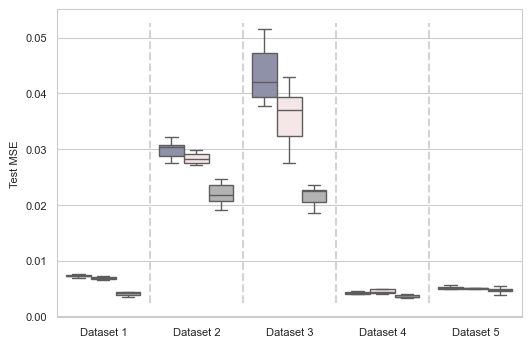

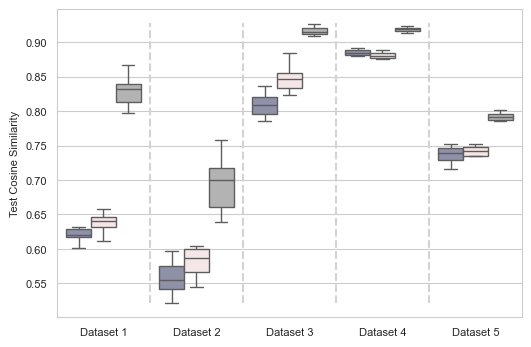

In [9]:
file_path = base_path+'/result/fig2/e/Ablation study.csv'
perform_all = pd.read_csv(file_path, sep=',')
sns.set_style('whitegrid')
colors = ['#8B8EAC', '#F8E3E5', '#B3B3B3']
for metric in ['Test MSE', 'Test Cosine Similarity']:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.boxplot(data=perform_all, x='Dataset', y=metric, hue="Model", hue_order=['scTranslator-scratch', 'scTranslator-bulk-only', 'scTranslator'], 
                palette=colors, showfliers=False, linewidth=1)
    x_start, y_start, y_end = 0.5, perform_all[metric].min()-0.001, perform_all[metric].max()+0.001

    plt.vlines(x_start, y_start, y_end, colors = 'lightgray', linestyles = 'dashed')
    plt.vlines(x_start+1, y_start, y_end, colors = 'lightgray', linestyles = 'dashed')
    plt.vlines(x_start+2, y_start, y_end, colors = 'lightgray', linestyles = 'dashed')
    plt.vlines(x_start+3, y_start, y_end, colors = 'lightgray', linestyles = 'dashed')
    plt.xlabel('')
    plt.legend([],[], frameon=False)
    ax.set_xlim(-0.5, 4.5)
    plt.show()
